In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ola_driver_scaler.csv')

In [3]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [4]:
df.columns

Index(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

In [5]:
df = df.drop(columns='Unnamed: 0')

In [6]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [8]:
df.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [9]:
df.groupby(by='Driver_ID')['Income'].mean()

Driver_ID
1       57387.0
2       67016.0
4       65603.0
5       46368.0
6       78728.0
         ...   
2784    82815.0
2785    12105.0
2786    35370.0
2787    69498.0
2788    70254.0
Name: Income, Length: 2381, dtype: float64

In [10]:
df.groupby(by='Driver_ID').mean()

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
Driver_ID,,,,,,,,
1,28.000000,0.0,2.0,57387.0,1.0,1.0,571860.000000,2.000000
2,31.000000,0.0,2.0,67016.0,2.0,2.0,0.000000,1.000000
4,43.000000,0.0,2.0,65603.0,2.0,2.0,70000.000000,1.000000
5,29.000000,0.0,0.0,46368.0,1.0,1.0,40120.000000,1.000000
6,31.000000,1.0,1.0,78728.0,3.0,3.0,253000.000000,1.600000
...,...,...,...,...,...,...,...,...
2784,33.500000,0.0,0.0,82815.0,2.0,3.0,906200.833333,2.625000
2785,34.000000,1.0,0.0,12105.0,1.0,1.0,0.000000,1.000000
2786,44.888889,0.0,0.0,35370.0,2.0,2.0,312787.777778,1.666667


In [11]:
df[df['LastWorkingDate'].isna()]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


In [12]:
df['LastWorkingDate'] = df['LastWorkingDate'].isna().apply(lambda x:0 if x else 1)

In [13]:
df['LastWorkingDate'].value_counts(normalize=True)

0    0.91541
1    0.08459
Name: LastWorkingDate, dtype: float64

In [14]:
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])

In [15]:
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])

In [16]:
df['City'] = df['City'].apply(lambda x:int(x[1:]))

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  int64         
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       19104 non-null  int64         
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

In [18]:
df.isna().sum()

MMM-YY                   0
Driver_ID                0
Age                     61
Gender                  52
City                     0
Education_Level          0
Income                   0
Dateofjoining            0
LastWorkingDate          0
Joining Designation      0
Grade                    0
Total Business Value     0
Quarterly Rating         0
dtype: int64

In [19]:
imp_data = df.drop(columns=['MMM-YY','Dateofjoining'])

In [20]:
imp_data.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,28.0,0.0,23,2,57387,0,1,1,2381060,2
1,1,28.0,0.0,23,2,57387,0,1,1,-665480,2
2,1,28.0,0.0,23,2,57387,1,1,1,0,2
3,2,31.0,0.0,7,2,67016,0,2,2,0,1
4,2,31.0,0.0,7,2,67016,0,2,2,0,1


In [21]:
from sklearn.impute import KNNImputer

In [22]:
imputer = KNNImputer()
data = imputer.fit_transform(imp_data)

In [23]:
imputed_data = pd.DataFrame(data,columns=imp_data.columns)

In [24]:
imputed_data['MMM-YY'] = df['MMM-YY']
imputed_data['Dateofjoining'] = df['Dateofjoining']

In [25]:
imputed_data.isna().sum()

Driver_ID               0
Age                     0
Gender                  0
City                    0
Education_Level         0
Income                  0
LastWorkingDate         0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
MMM-YY                  0
Dateofjoining           0
dtype: int64

In [26]:
imputed_data.groupby('Driver_ID').mean()

,Age,Gender,City,Education_Level,Income,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
Driver_ID,,,,,,,,,,
1.0,28.000000,0.0,23.0,2.0,57387.0,0.333333,1.0,1.0,571860.000000,2.000000
2.0,31.000000,0.0,7.0,2.0,67016.0,0.000000,2.0,2.0,0.000000,1.000000
4.0,43.000000,0.0,13.0,2.0,65603.0,0.200000,2.0,2.0,70000.000000,1.000000
5.0,29.000000,0.0,9.0,0.0,46368.0,0.333333,1.0,1.0,40120.000000,1.000000
6.0,31.000000,1.0,11.0,1.0,78728.0,0.000000,3.0,3.0,253000.000000,1.600000
...,...,...,...,...,...,...,...,...,...,...
2784.0,33.500000,0.0,24.0,0.0,82815.0,0.000000,2.0,3.0,906200.833333,2.625000
2785.0,34.000000,1.0,9.0,0.0,12105.0,0.333333,1.0,1.0,0.000000,1.000000
2786.0,44.888889,0.0,19.0,0.0,35370.0,0.111111,2.0,2.0,312787.777778,1.666667


In [27]:
imputed_data.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,MMM-YY,Dateofjoining
0,1.0,28.0,0.0,23.0,2.0,57387.0,0.0,1.0,1.0,2381060.0,2.0,2019-01-01,2018-12-24
1,1.0,28.0,0.0,23.0,2.0,57387.0,0.0,1.0,1.0,-665480.0,2.0,2019-02-01,2018-12-24
2,1.0,28.0,0.0,23.0,2.0,57387.0,1.0,1.0,1.0,0.0,2.0,2019-03-01,2018-12-24
3,2.0,31.0,0.0,7.0,2.0,67016.0,0.0,2.0,2.0,0.0,1.0,2020-11-01,2020-11-06
4,2.0,31.0,0.0,7.0,2.0,67016.0,0.0,2.0,2.0,0.0,1.0,2020-12-01,2020-11-06


In [28]:
imputed_data.sort_values(by = ['Driver_ID','MMM-YY'],inplace=True)

In [29]:
unique_driver_id = list(imputed_data['Driver_ID'].unique())

In [30]:
imputed_data[imputed_data['Driver_ID']==1]['Quarterly Rating'].diff()

0    NaN
1    0.0
2    0.0
Name: Quarterly Rating, dtype: float64

In [31]:
quar_rating = []
for i in unique_driver_id:
    quar_rating.extend(list(imputed_data[imputed_data['Driver_ID']==i]['Quarterly Rating'].diff()))
print(quar_rating)

[nan, 0.0, 0.0, nan, 0.0, nan, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, nan, 0.0, 1.0, 0.0, 0.0, nan, 0.0, 0.0, nan, nan, 0.0, 0.0, -3.0, 0.0, 0.0, nan, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, nan, 0.0, nan, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, -2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, nan, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, -1.0, nan, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.0, 0.0, 2.0, -2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, -1.0, 0.0, nan, 0.0, 0.0, nan, 0.0, 0.0, 1.0, 0.0, 0.0, nan, 0.0, -1.0, 0.0, nan, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 2.0, 0.0, 0.0, -1.0, 0.0

In [32]:
quar_rating = pd.Series(quar_rating).fillna(0)

In [33]:
quar_rating = pd.Series([1 if i>0 else 0 for i in quar_rating])

In [34]:
quar_rating

0        0
1        0
2        0
3        0
4        0
        ..
19099    0
19100    0
19101    0
19102    0
19103    0
Length: 19104, dtype: int64

In [35]:
imputed_data['rating_increase'] = quar_rating

In [36]:
imputed_data[imputed_data['rating_increase']==1].shape

(1245, 14)

In [37]:
income_increase = []
for i in unique_driver_id:
    income_increase.extend(imputed_data[imputed_data['Driver_ID']==i]['Total Business Value'].diff())

In [38]:
income_increase = pd.Series(income_increase).fillna(0)

In [39]:
income_increase

0              0.0
1       -3046540.0
2         665480.0
3              0.0
4              0.0
           ...    
19099     242590.0
19100    -291910.0
19101    -448370.0
19102     200420.0
19103     211060.0
Length: 19104, dtype: float64

In [40]:
income_increase = pd.Series([1 if i>0 else 0 for i in income_increase])

In [41]:
imputed_data['income_increase'] = income_increase

In [42]:
imputed_data[imputed_data['income_increase']==1].shape

(7045, 15)

In [43]:
new_imputed_data = imputed_data.groupby('Driver_ID').mean()

In [44]:
new_imputed_data.reset_index(inplace=True)

In [45]:
new_imputed_data.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,rating_increase,income_increase
0,1.0,28.0,0.0,23.0,2.0,57387.0,0.333333,1.0,1.0,571860.0,2.0,0.0,0.333333
1,2.0,31.0,0.0,7.0,2.0,67016.0,0.000000,2.0,2.0,0.0,1.0,0.0,0.000000
2,4.0,43.0,0.0,13.0,2.0,65603.0,0.200000,2.0,2.0,70000.0,1.0,0.0,0.200000
3,5.0,29.0,0.0,9.0,0.0,46368.0,0.333333,1.0,1.0,40120.0,1.0,0.0,0.333333
4,6.0,31.0,1.0,11.0,1.0,78728.0,0.000000,3.0,3.0,253000.0,1.6,0.2,0.200000


In [46]:
new_imputed_data['LastWorkingDate'] = new_imputed_data['LastWorkingDate'].apply(lambda x:1 if x>0 else 0)
new_imputed_data['rating_increase'] = new_imputed_data['rating_increase'].apply(lambda x:1 if x>0 else 0)
new_imputed_data['income_increase'] = new_imputed_data['income_increase'].apply(lambda x:1 if x>0 else 0)

In [47]:
new_imputed_data.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,rating_increase,income_increase
0,1.0,28.0,0.0,23.0,2.0,57387.0,1,1.0,1.0,571860.0,2.0,0,1
1,2.0,31.0,0.0,7.0,2.0,67016.0,0,2.0,2.0,0.0,1.0,0,0
2,4.0,43.0,0.0,13.0,2.0,65603.0,1,2.0,2.0,70000.0,1.0,0,1
3,5.0,29.0,0.0,9.0,0.0,46368.0,1,1.0,1.0,40120.0,1.0,0,1
4,6.0,31.0,1.0,11.0,1.0,78728.0,0,3.0,3.0,253000.0,1.6,1,1


In [48]:
new_imputed_data['LastWorkingDate'].value_counts(normalize=True)

1    0.678706
0    0.321294
Name: LastWorkingDate, dtype: float64

In [49]:
new_imputed_data.columns

Index(['Driver_ID', 'Age', 'Gender', 'City', 'Education_Level', 'Income',
       'LastWorkingDate', 'Joining Designation', 'Grade',
       'Total Business Value', 'Quarterly Rating', 'rating_increase',
       'income_increase'],
      dtype='object')

In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
Y = new_imputed_data['LastWorkingDate']
X = new_imputed_data.drop(columns='LastWorkingDate')

In [52]:
X,y = SMOTE().fit_resample(X,Y)

In [53]:
X.shape

(3232, 12)

In [54]:
new_imputed_data.shape

(2381, 13)

In [55]:
y.value_counts(normalize=True)

1    0.5
0    0.5
Name: LastWorkingDate, dtype: float64

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()

In [58]:
scaler.fit_transform(X)

array([[-1.80330765, -0.98567047, -0.86976624, ...,  0.43076621,
        -0.80507062,  0.6698341 ],
       [-1.80200678, -0.45038623, -0.86976624, ..., -0.87085912,
        -0.80507062, -1.49290697],
       [-1.79940503,  1.69075072, -0.86976624, ..., -0.87085912,
        -0.80507062,  0.6698341 ],
       ...,
       [ 0.91340473, -0.36428831,  1.17703223, ..., -0.85341244,
        -0.80507062,  0.6698341 ],
       [ 0.94181309, -0.08562371,  0.82526607, ..., -0.87085912,
        -0.80507062, -1.49290697],
       [-0.54324699, -0.34422751, -0.05792626, ..., -0.22004646,
        -0.80507062,  0.6698341 ]])

In [59]:
X

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,rating_increase,income_increase
0,1.000000,28.000000,0.000000,23.000000,2.000000,57387.000000,1.000000,1.000000,571860.000000,2.000000,0,1
1,2.000000,31.000000,0.000000,7.000000,2.000000,67016.000000,2.000000,2.000000,0.000000,1.000000,0,0
2,4.000000,43.000000,0.000000,13.000000,2.000000,65603.000000,2.000000,2.000000,70000.000000,1.000000,0,1
3,5.000000,29.000000,0.000000,9.000000,0.000000,46368.000000,1.000000,1.000000,40120.000000,1.000000,0,1
4,6.000000,31.000000,1.000000,11.000000,1.000000,78728.000000,3.000000,3.000000,253000.000000,1.600000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3227,2188.530793,32.889829,0.000000,20.033830,1.322057,139798.477399,1.322057,3.677943,963999.033006,2.161028,0,1
3228,2492.741828,36.377732,0.911105,2.600119,0.911105,50727.930342,2.911105,2.911105,75610.780429,1.000000,0,1
3229,2089.376009,31.482536,0.955321,20.776604,1.000000,70831.436366,2.044679,2.044679,135857.389946,1.013404,0,1
3230,2111.213922,33.044311,0.791138,11.506347,1.791138,57583.399035,2.208862,2.208862,0.000000,1.000000,0,0


In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
bag = RandomForestClassifier()

In [65]:
np.arange(50,1000,50)

array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650,
       700, 750, 800, 850, 900, 950])

In [66]:
np.arange(1,27,2)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25])

In [67]:
parameters = {'max_depth':np.arange(1,27,2),'n_estimators':np.arange(50,1000,50)}
bag_clf = GridSearchCV(bag,parameters,cv=5,n_jobs=-1)
bag_clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25]),
                         'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650,
       700, 750, 800, 850, 900, 950])})

In [68]:
bag_clf.best_estimator_

RandomForestClassifier(max_depth=19, n_estimators=400)

In [69]:
y_pred = bag_clf.predict(x_test)

In [70]:
from sklearn.metrics import f1_score,precision_score,recall_score,roc_auc_score,confusion_matrix,roc_curve,precision_recall_curve

In [71]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

In [72]:
precision_score(y_test.values,y_pred)

0.8040293040293041

In [73]:
recall_score(y_test,y_pred)

0.8377862595419847

In [74]:
f1_score(y_test,y_pred)

0.8205607476635515

In [75]:
roc_auc_score(y_test,y_pred)

0.8203664262719131

In [76]:
y_pred_proba = bag_clf.predict_proba(x_test)

In [77]:
y_pred_proba

array([[0.965     , 0.035     ],
       [0.9525    , 0.0475    ],
       [0.885     , 0.115     ],
       ...,
       [0.53879001, 0.46120999],
       [0.9725    , 0.0275    ],
       [0.0925    , 0.9075    ]])

In [78]:
fpr, tpr, threshold = roc_curve(y_test,y_pred_proba[:,1])

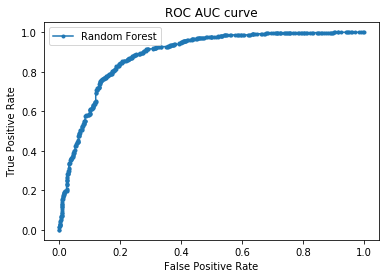

In [79]:
plt.plot(fpr,tpr,marker='.',label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC curve')
plt.legend()
plt.show()

In [80]:
import xgboost as xgb

In [81]:
xgb_clf = xgb.XGBClassifier(tree_method='gpu_hist', gpu_id=0)

In [87]:
np.arange(50,500,50)

array([ 50, 100, 150, 200, 250, 300, 350, 400, 450])

In [83]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [86]:
np.arange(0,0.5,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4])

In [88]:
parameters_xgb = {'n_estimators':np.arange(50,500,50),'max_depth':np.arange(1,10),'learning_rate':np.arange(0,0.5,0.1)}
boost_clf = GridSearchCV(xgb_clf,parameters_xgb,cv=5,n_jobs=-1)
boost_clf.fit(x_train,y_train)

C:\Users\satis\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=0, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_t...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                        

In [89]:
boost_clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [90]:
y_pred = boost_clf.predict(x_test)

In [91]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

In [92]:
precision_score(y_test,y_pred)

0.7905282331511839

In [93]:
recall_score(y_test,y_pred)

0.8282442748091603

In [94]:
f1_score(y_test,y_pred)

0.8089468779123951

In [97]:
roc_auc_score(y_test,y_pred)

0.8082289514008969

In [98]:
y_pred_proba = boost_clf.predict_proba(x_test)

In [99]:
y_pred_proba

array([[0.99623466, 0.00376536],
       [0.9944445 , 0.00555549],
       [0.9669743 , 0.03302568],
       ...,
       [0.82659894, 0.17340107],
       [0.99595493, 0.00404507],
       [0.08036381, 0.9196362 ]], dtype=float32)

In [100]:
fpr, tpr, threshold = roc_curve(y_test,y_pred_proba[:,1])

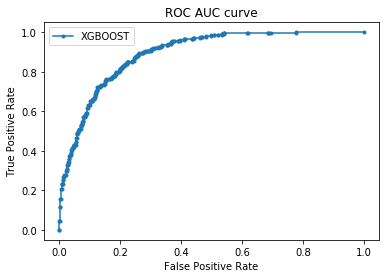

In [102]:
plt.plot(fpr,tpr,marker='.',label='XGBOOST')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC curve')
plt.legend()
plt.show()